In [12]:
import numpy as np
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
from ecit import *


def ecit_simu(n_list=[400,800,2000,4000],
              t=100,
              cit=kcit,
              ensembles=[(p_alpha175,1), (p_alpha175,2), (p_alpha175,400)],
              show_progress=True,
              dz=1,n_indp='N',z_dis='gaussian',noise_dis='gaussian',noise_std=0.3,fun1=None,fun2=None):
    
    results = []

    for p_ensemble, k in ensembles:

        if show_progress: print(f"Ensemble (k={k}, {p_ensemble.__name__})") if k>1 else print(f"Default (k=1)")

        eI = [0]*len(n_list)
        eII = [0]*len(n_list)
        tim = [0]*len(n_list)

        for i, n in enumerate(n_list):

            start_time = time.time()
            iteration_loop = tqdm(range(t), desc=f"n={n}", leave=True, dynamic_ncols=True) if show_progress else range(t)
            for sed in iteration_loop:
                np.random.seed(sed)
                random.seed(sed)
                dataI = np.hstack((generate_samples(n=n,dz=dz,indp='C',z_dis=z_dis, noise_dis=noise_dis,noise_std=noise_std,
                                                    fun1=fun1, fun2=fun1)))
                dataII = np.hstack((generate_samples(n=n,dz=dz,indp=n_indp,z_dis=z_dis, noise_dis=noise_dis,noise_std=noise_std,
                                                     fun1=fun1, fun2=fun1)))
                obj_ECIT = ECIT(dataI, cit, p_ensemble, k if k<100 else int(n/k))
                pI = obj_ECIT([0], [1], [2])
                obj_ECIT = ECIT(dataII, cit, p_ensemble, k if k<100 else int(n/k))
                pII = obj_ECIT([0], [1], [2])
                if pI<0.05:
                    eI[i] += 1
                if pII>0.05:
                    eII[i] += 1

            end_time = time.time()
            tim[i] = end_time - start_time
            eI[i] = eI[i]/t
            eII[i] = eII[i]/t

        results.append([eI, eII, tim])

    return results




def show_results(results, ensembles, n_list):
    dir = {}
    for (p_ensemble, k), result in zip(ensembles, results):
        key_name = f"Ensemble (k={k}, {p_ensemble.__name__})" if k > 1 else f"Default (k=1)"
        dir[key_name] = result

    fig, axes = plt.subplots(2, 2, figsize=(16, 10), dpi=300, sharex=True)
    (ax_eI, ax_eII), (ax_eSum, ax_tim) = axes

    for label, result in dir.items():
        eI, eII, tim = result
        eSum = np.array(eI) + np.array(eII)

        ax_eI.plot(n_list, eI, label=label)
        ax_eII.plot(n_list, eII)
        ax_eSum.plot(n_list, eSum)
        ax_tim.plot(n_list, tim)

    ax_eI.set_title("Error I")
    ax_eI.set_ylabel("Error Rate")

    ax_eII.set_title("Error II")

    ax_eSum.set_title("Error I + Error II")
    ax_eSum.set_xlabel("Sample Size (n)")   
    ax_eSum.set_ylabel("Error Rate")


    ax_tim.set_title("Execution Time")
    ax_tim.set_ylabel("Time (s)")
    ax_tim.set_xlabel("Sample Size (n)")

    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, fontsize=12)

    ax_tim.set_xticks(n_list)
    ax_eSum.set_xticks(n_list)

    plt.tight_layout()
    plt.show()

In [13]:
n_list = [2000, 4000]
ensembles = [(p_alpha175, 1), (p_alpha175, 1000)]
t = 1000
cit = ccit

Default (k=1)


n=4000: 100%|██████████| 1000/1000 [8:04:59<00:00, 29.10s/it] 


Ensemble (k=1000, p_alpha175)


n=4000:   1%|          | 8/1000 [13:34<26:33:54, 96.41s/it] /Users/gzk/anaconda3/envs/graph/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
n=4000:  11%|█         | 106/1000 [2:54:27<25:05:33, 101.04s/it]/Users/gzk/anaconda3/envs/graph/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
n=4000:  12%|█▏        | 117/1000 [3:11:45<24:49:33, 101.22s/it]/Users/gzk/anaconda3/envs/graph/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
n=4000:  45%|████▌     | 452/1000 [12:19:18<14:32:14, 95.50s/it] /Users/gzk/anaconda3/envs/graph/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in redu

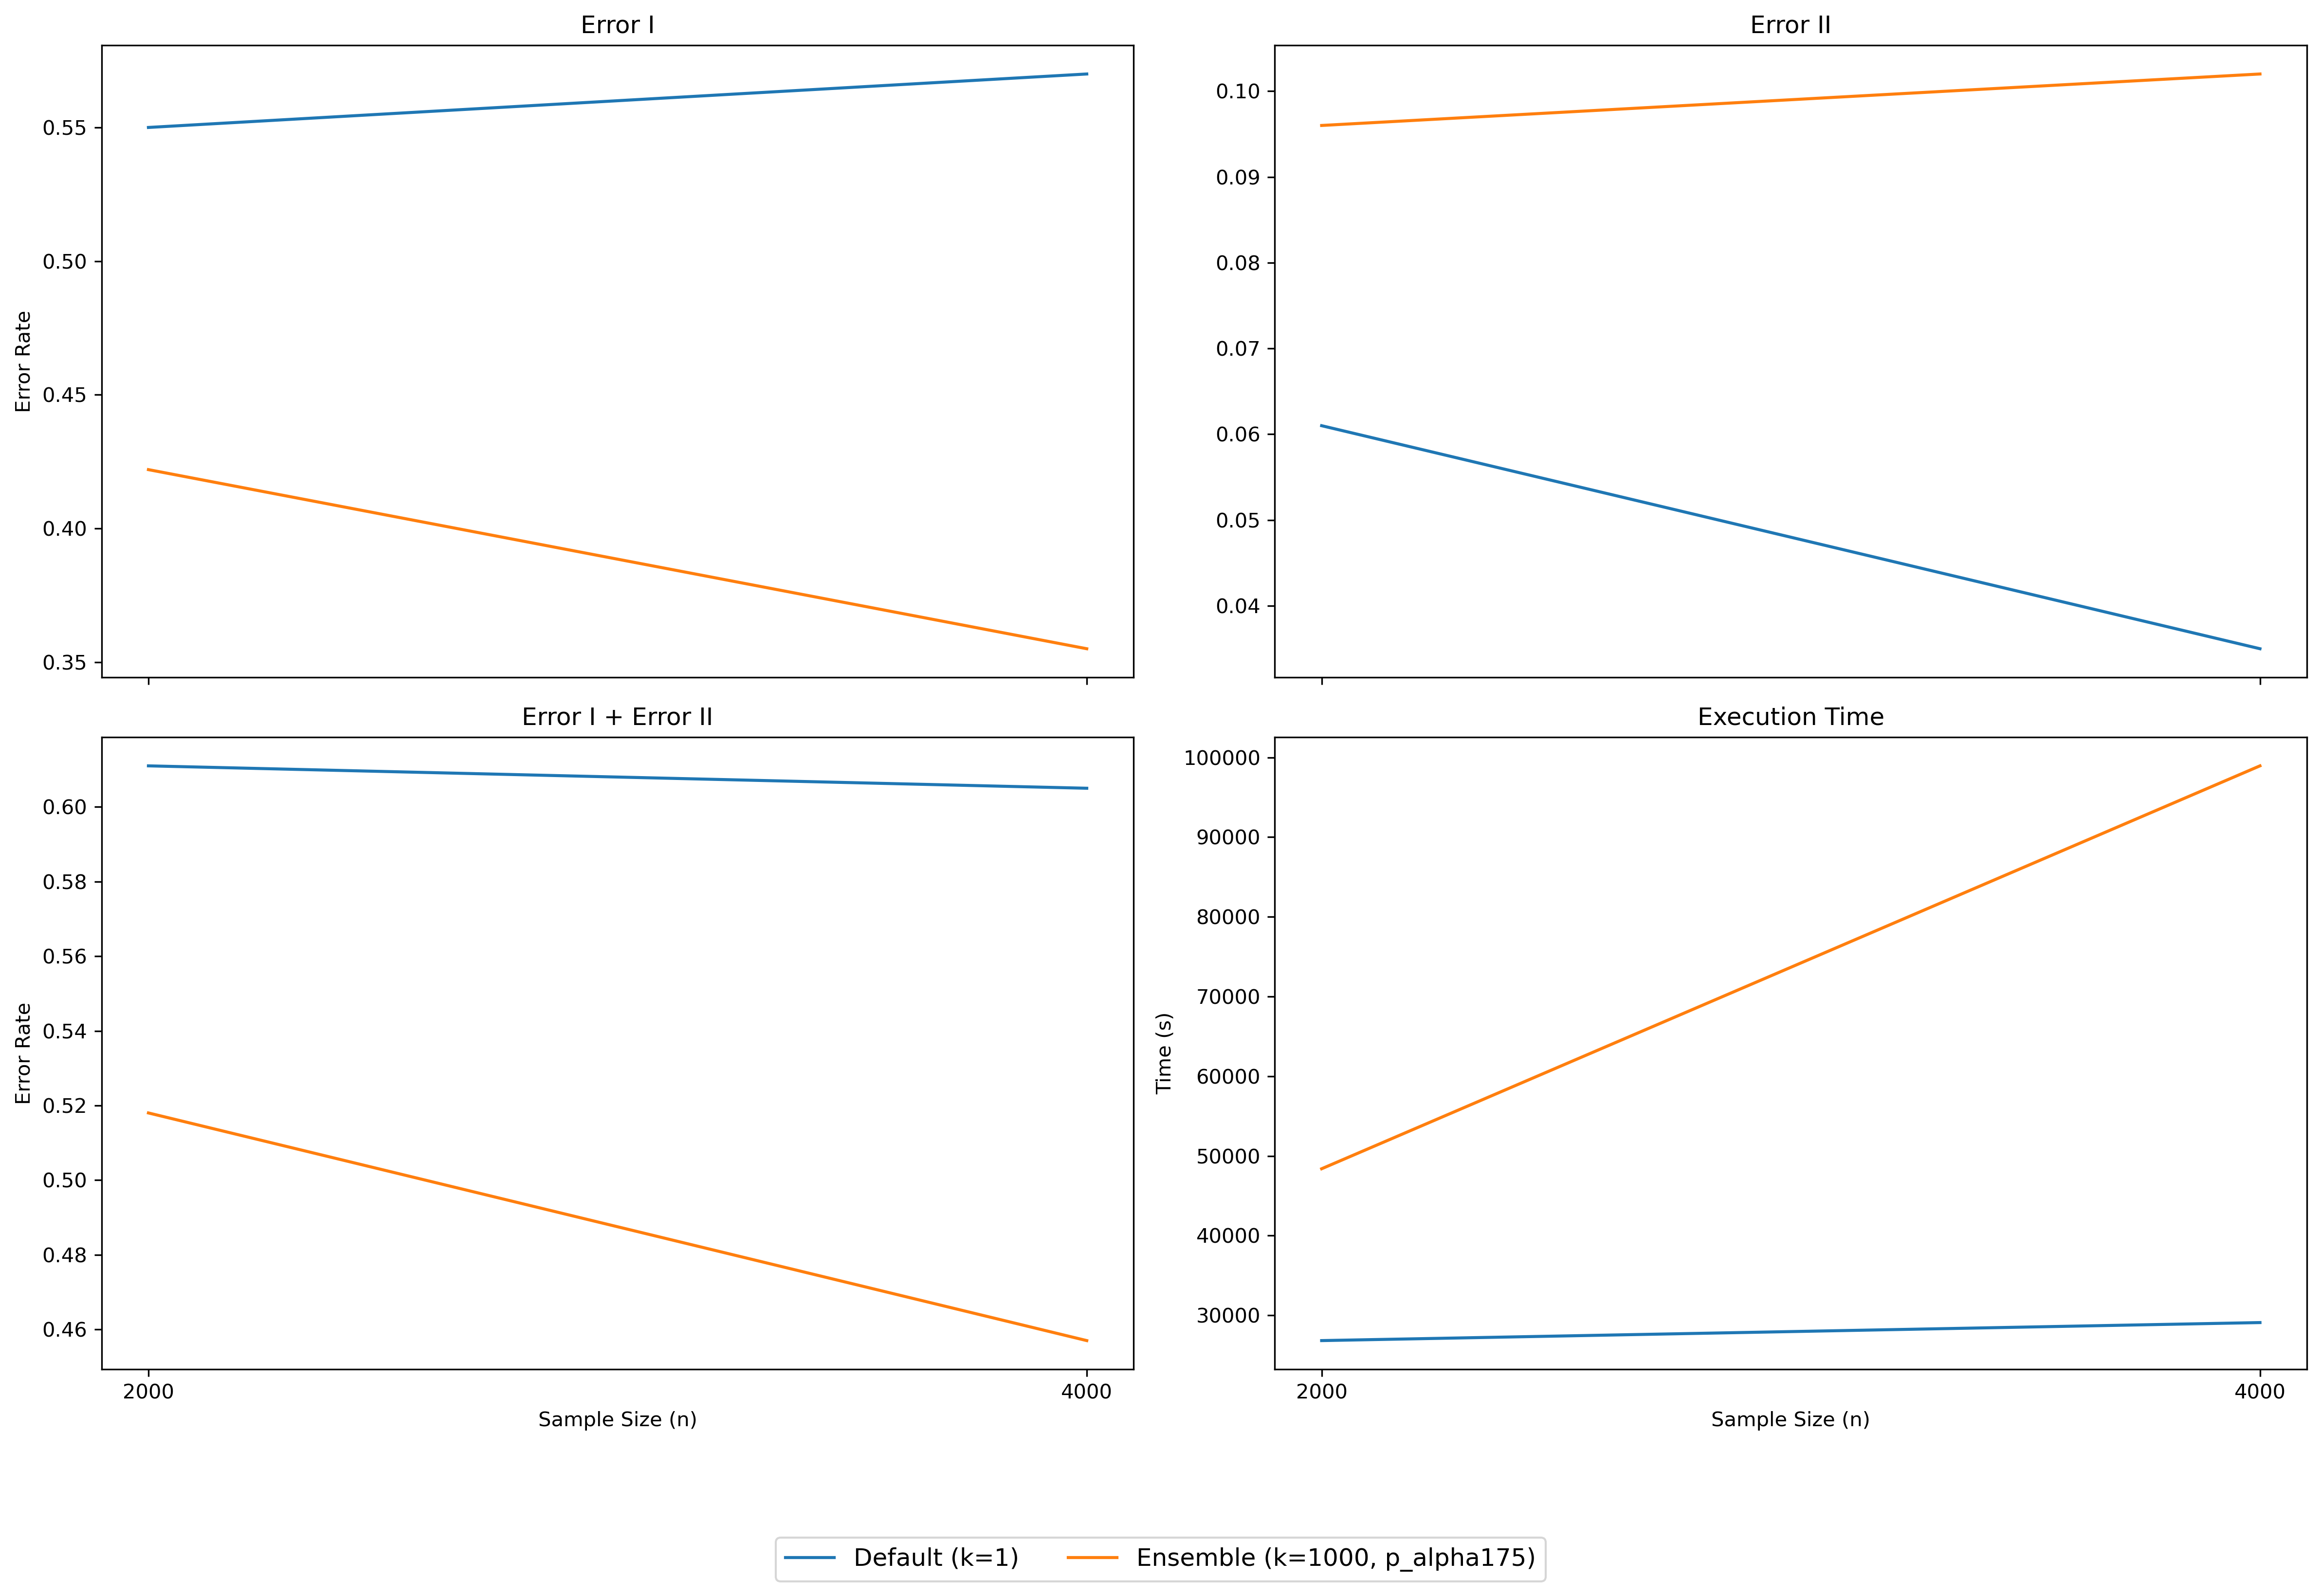

[[[0.55, 0.57], [0.061, 0.035], [26838.169430971146, 29099.806344985962]],
 [[0.422, 0.355], [0.096, 0.102], [48395.29432821274, 98940.40343499184]]]

In [14]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=2,z_dis='gaussian',noise_dis='t',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results

Default (k=1)


n=4000: 100%|██████████| 1000/1000 [7:55:19<00:00, 28.52s/it] 


Ensemble (k=1000, p_alpha175)


n=2000:  21%|██▏       | 214/1000 [2:55:44<11:20:49, 51.97s/it]/Users/gzk/anaconda3/envs/graph/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
n=2000:  53%|█████▎    | 527/1000 [7:09:32<6:31:38, 49.68s/it] /Users/gzk/anaconda3/envs/graph/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
n=2000:  58%|█████▊    | 579/1000 [7:51:48<5:52:06, 50.18s/it]/Users/gzk/anaconda3/envs/graph/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
n=2000:  60%|█████▉    | 596/1000 [8:05:25<5:16:30, 47.01s/it]/Users/gzk/anaconda3/envs/graph/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce


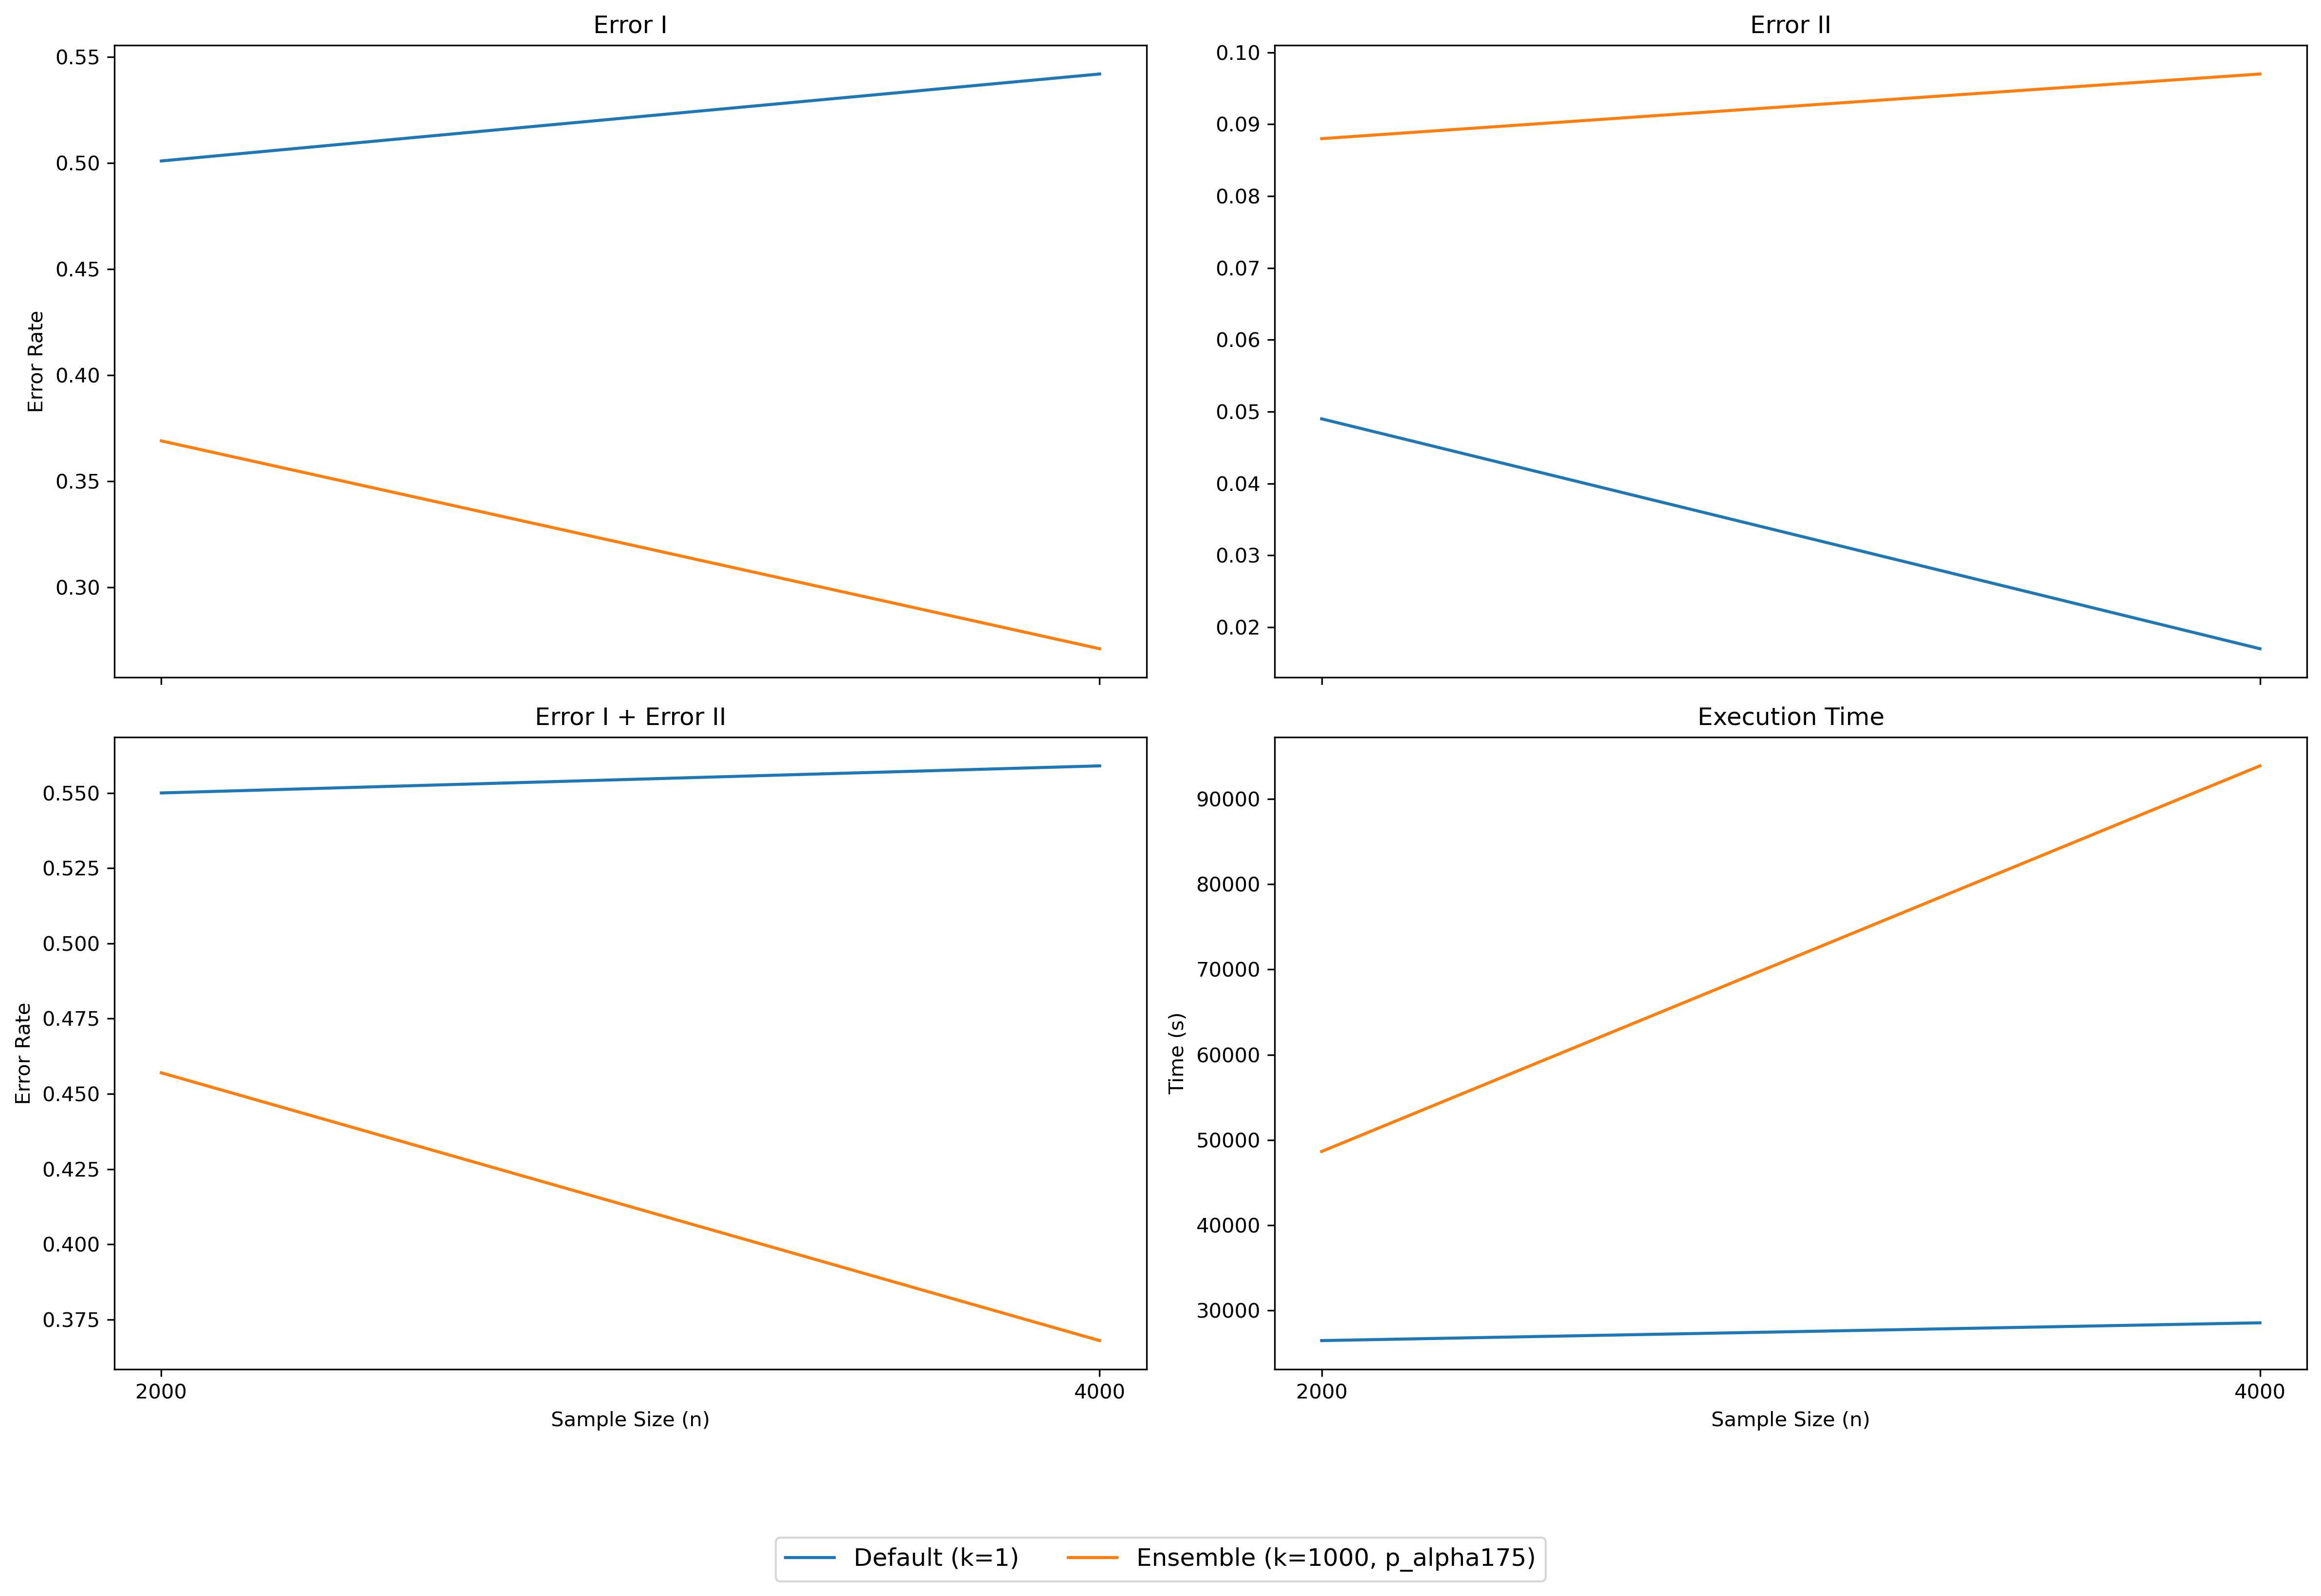

[[[0.501, 0.542], [0.049, 0.017], [26432.69302892685, 28519.923936128616]],
 [[0.369, 0.271], [0.088, 0.097], [48636.030077934265, 93908.60082268715]]]

In [15]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=5,z_dis='gaussian',noise_dis='t',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results

Default (k=1)


n=4000: 100%|██████████| 1000/1000 [7:44:56<00:00, 27.90s/it] 


Ensemble (k=1000, p_alpha175)


n=2000:  10%|▉         | 99/1000 [1:16:38<11:11:14, 44.70s/it]/Users/gzk/anaconda3/envs/graph/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
n=2000:  54%|█████▍    | 541/1000 [6:56:25<6:27:41, 50.68s/it] /Users/gzk/anaconda3/envs/graph/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
n=2000:  83%|████████▎ | 833/1000 [10:40:21<2:04:51, 44.86s/it]/Users/gzk/anaconda3/envs/graph/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
n=4000:   2%|▏         | 20/1000 [29:46<24:32:24, 90.15s/it]/Users/gzk/anaconda3/envs/graph/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  

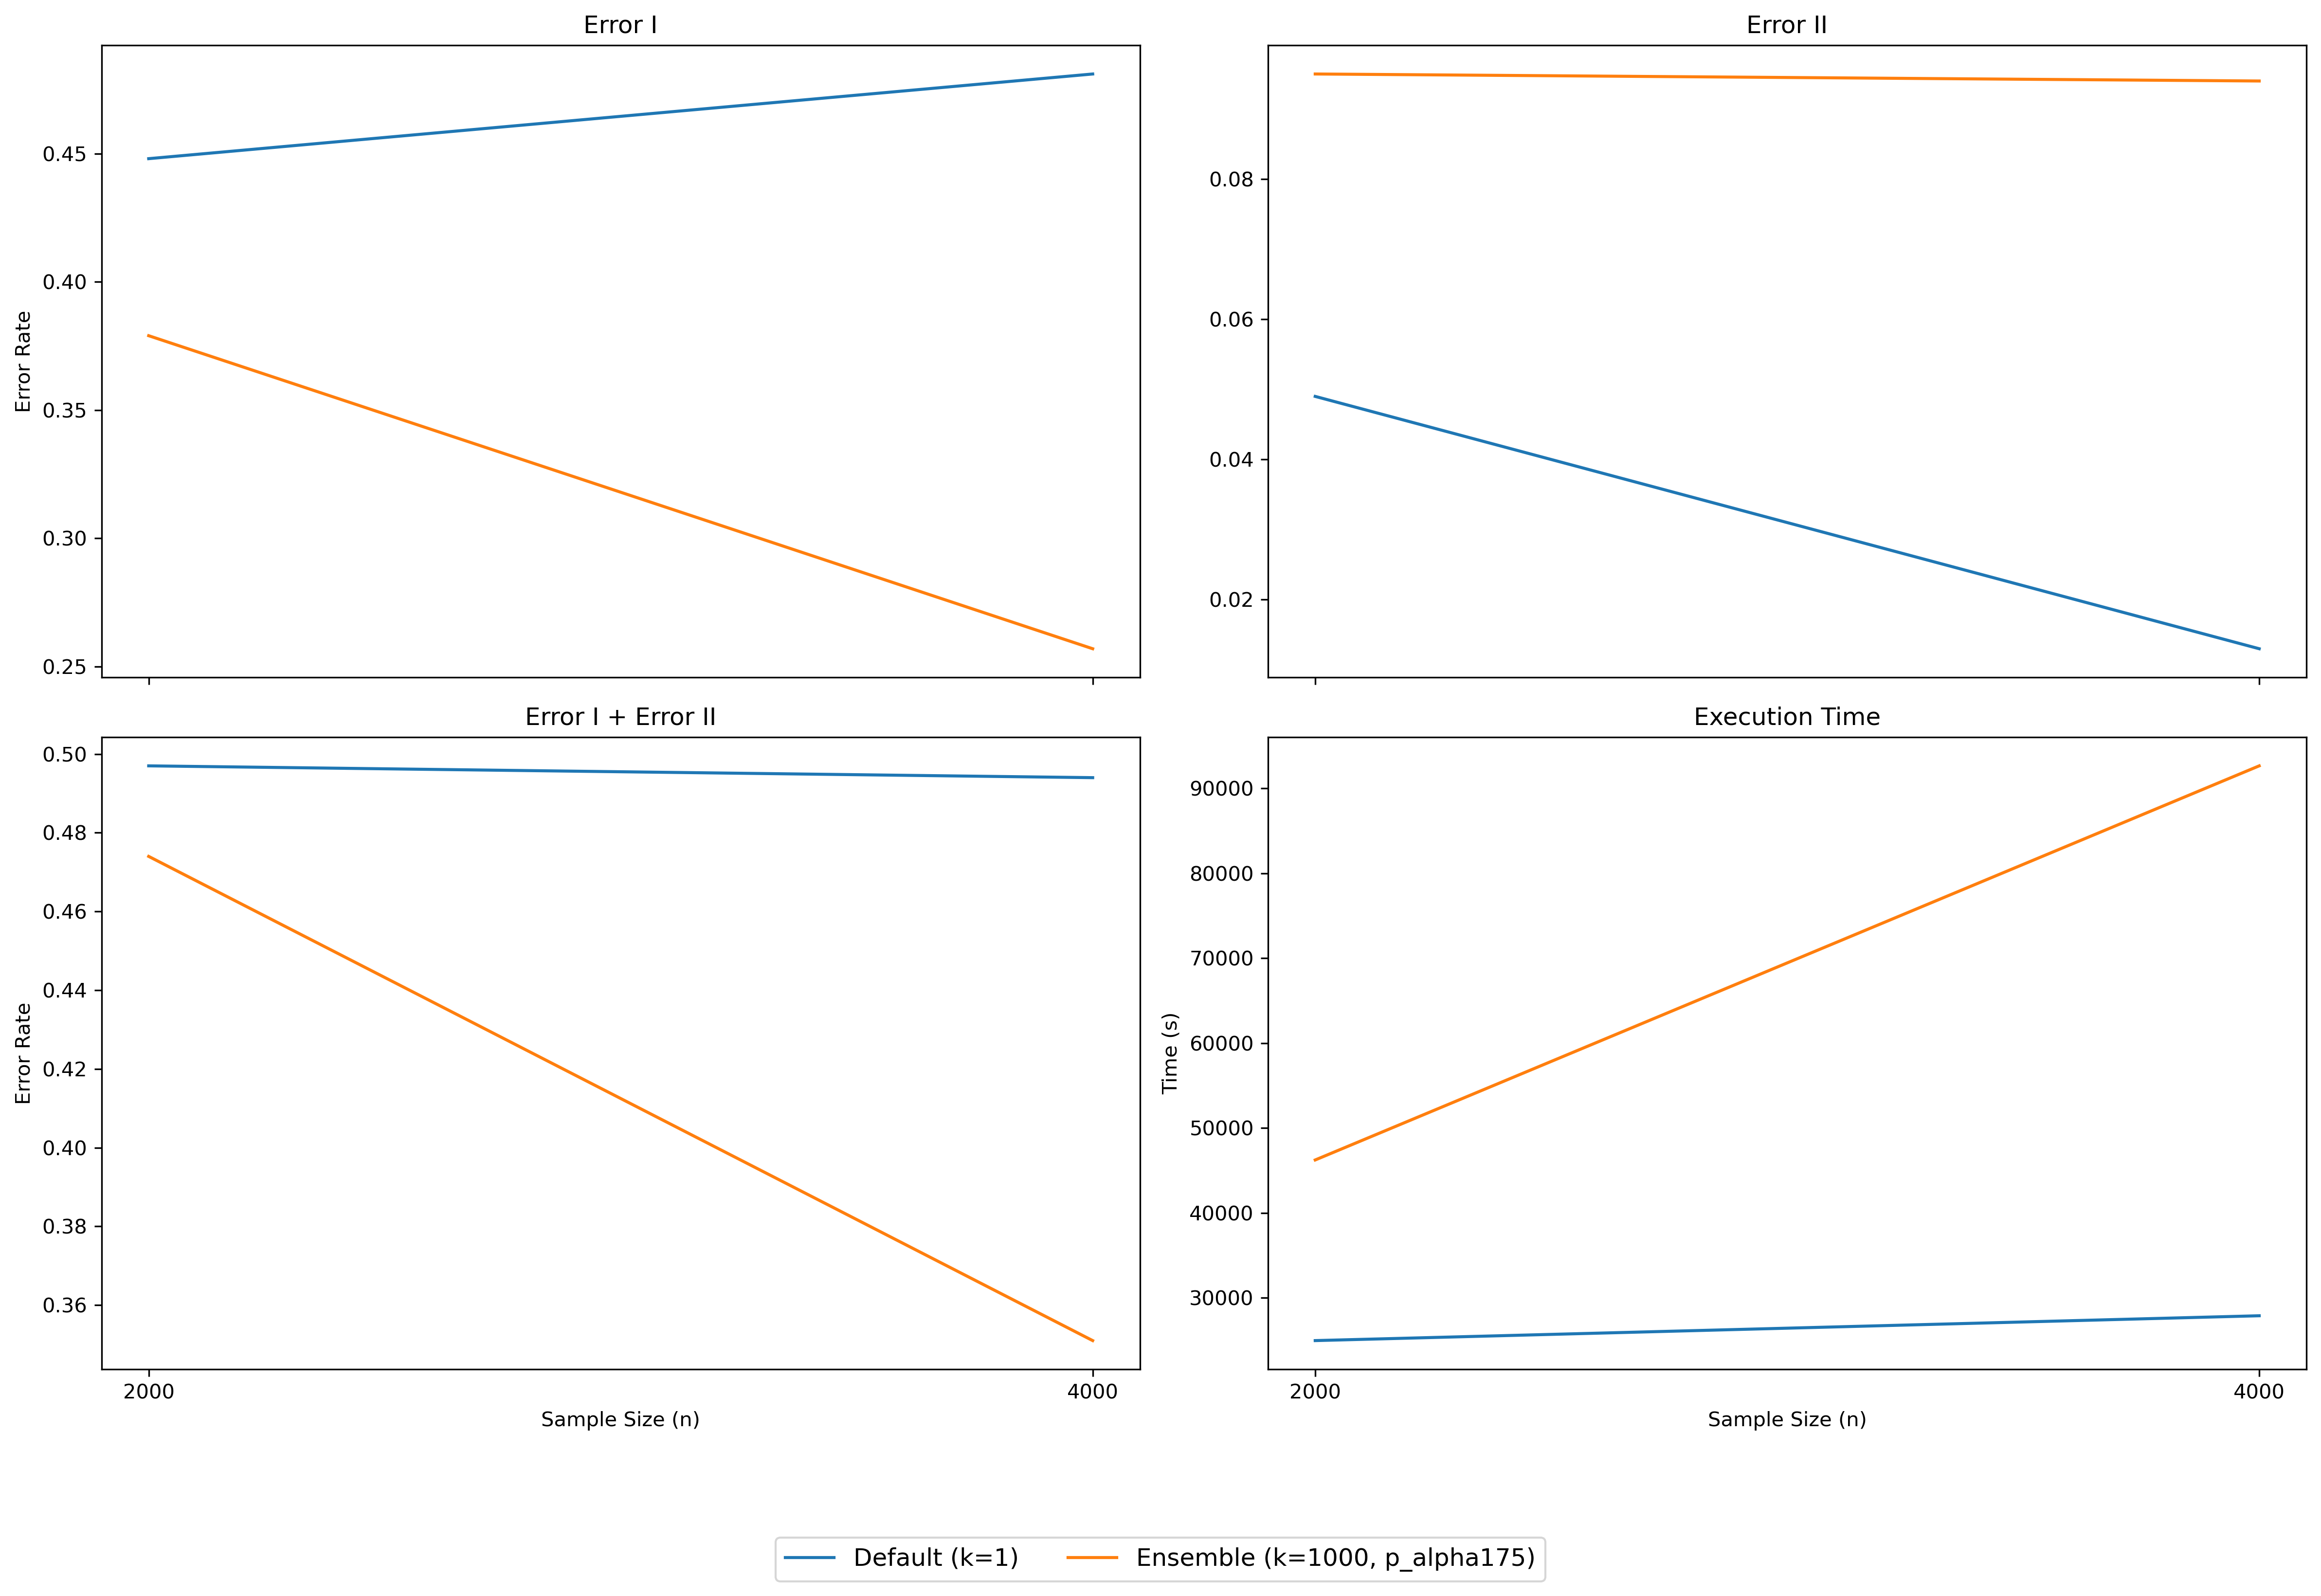

[[[0.448, 0.481], [0.049, 0.013], [24971.669861793518, 27896.83632016182]],
 [[0.379, 0.257], [0.095, 0.094], [46242.203802108765, 92650.74633812904]]]

In [16]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=10,z_dis='gaussian',noise_dis='t',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results

Default (k=1)


n=4000: 100%|██████████| 1000/1000 [7:43:01<00:00, 27.78s/it] 


Ensemble (k=1000, p_alpha175)


n=2000:   7%|▋         | 67/1000 [51:37<11:45:29, 45.37s/it]/Users/gzk/anaconda3/envs/graph/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
n=4000:  12%|█▏        | 120/1000 [3:15:05<24:45:04, 101.25s/it]/Users/gzk/anaconda3/envs/graph/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
n=4000:  17%|█▋        | 167/1000 [4:30:14<20:59:57, 90.75s/it] /Users/gzk/anaconda3/envs/graph/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
n=4000:  21%|██        | 207/1000 [5:37:20<20:45:11, 94.21s/it] /Users/gzk/anaconda3/envs/graph/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduc

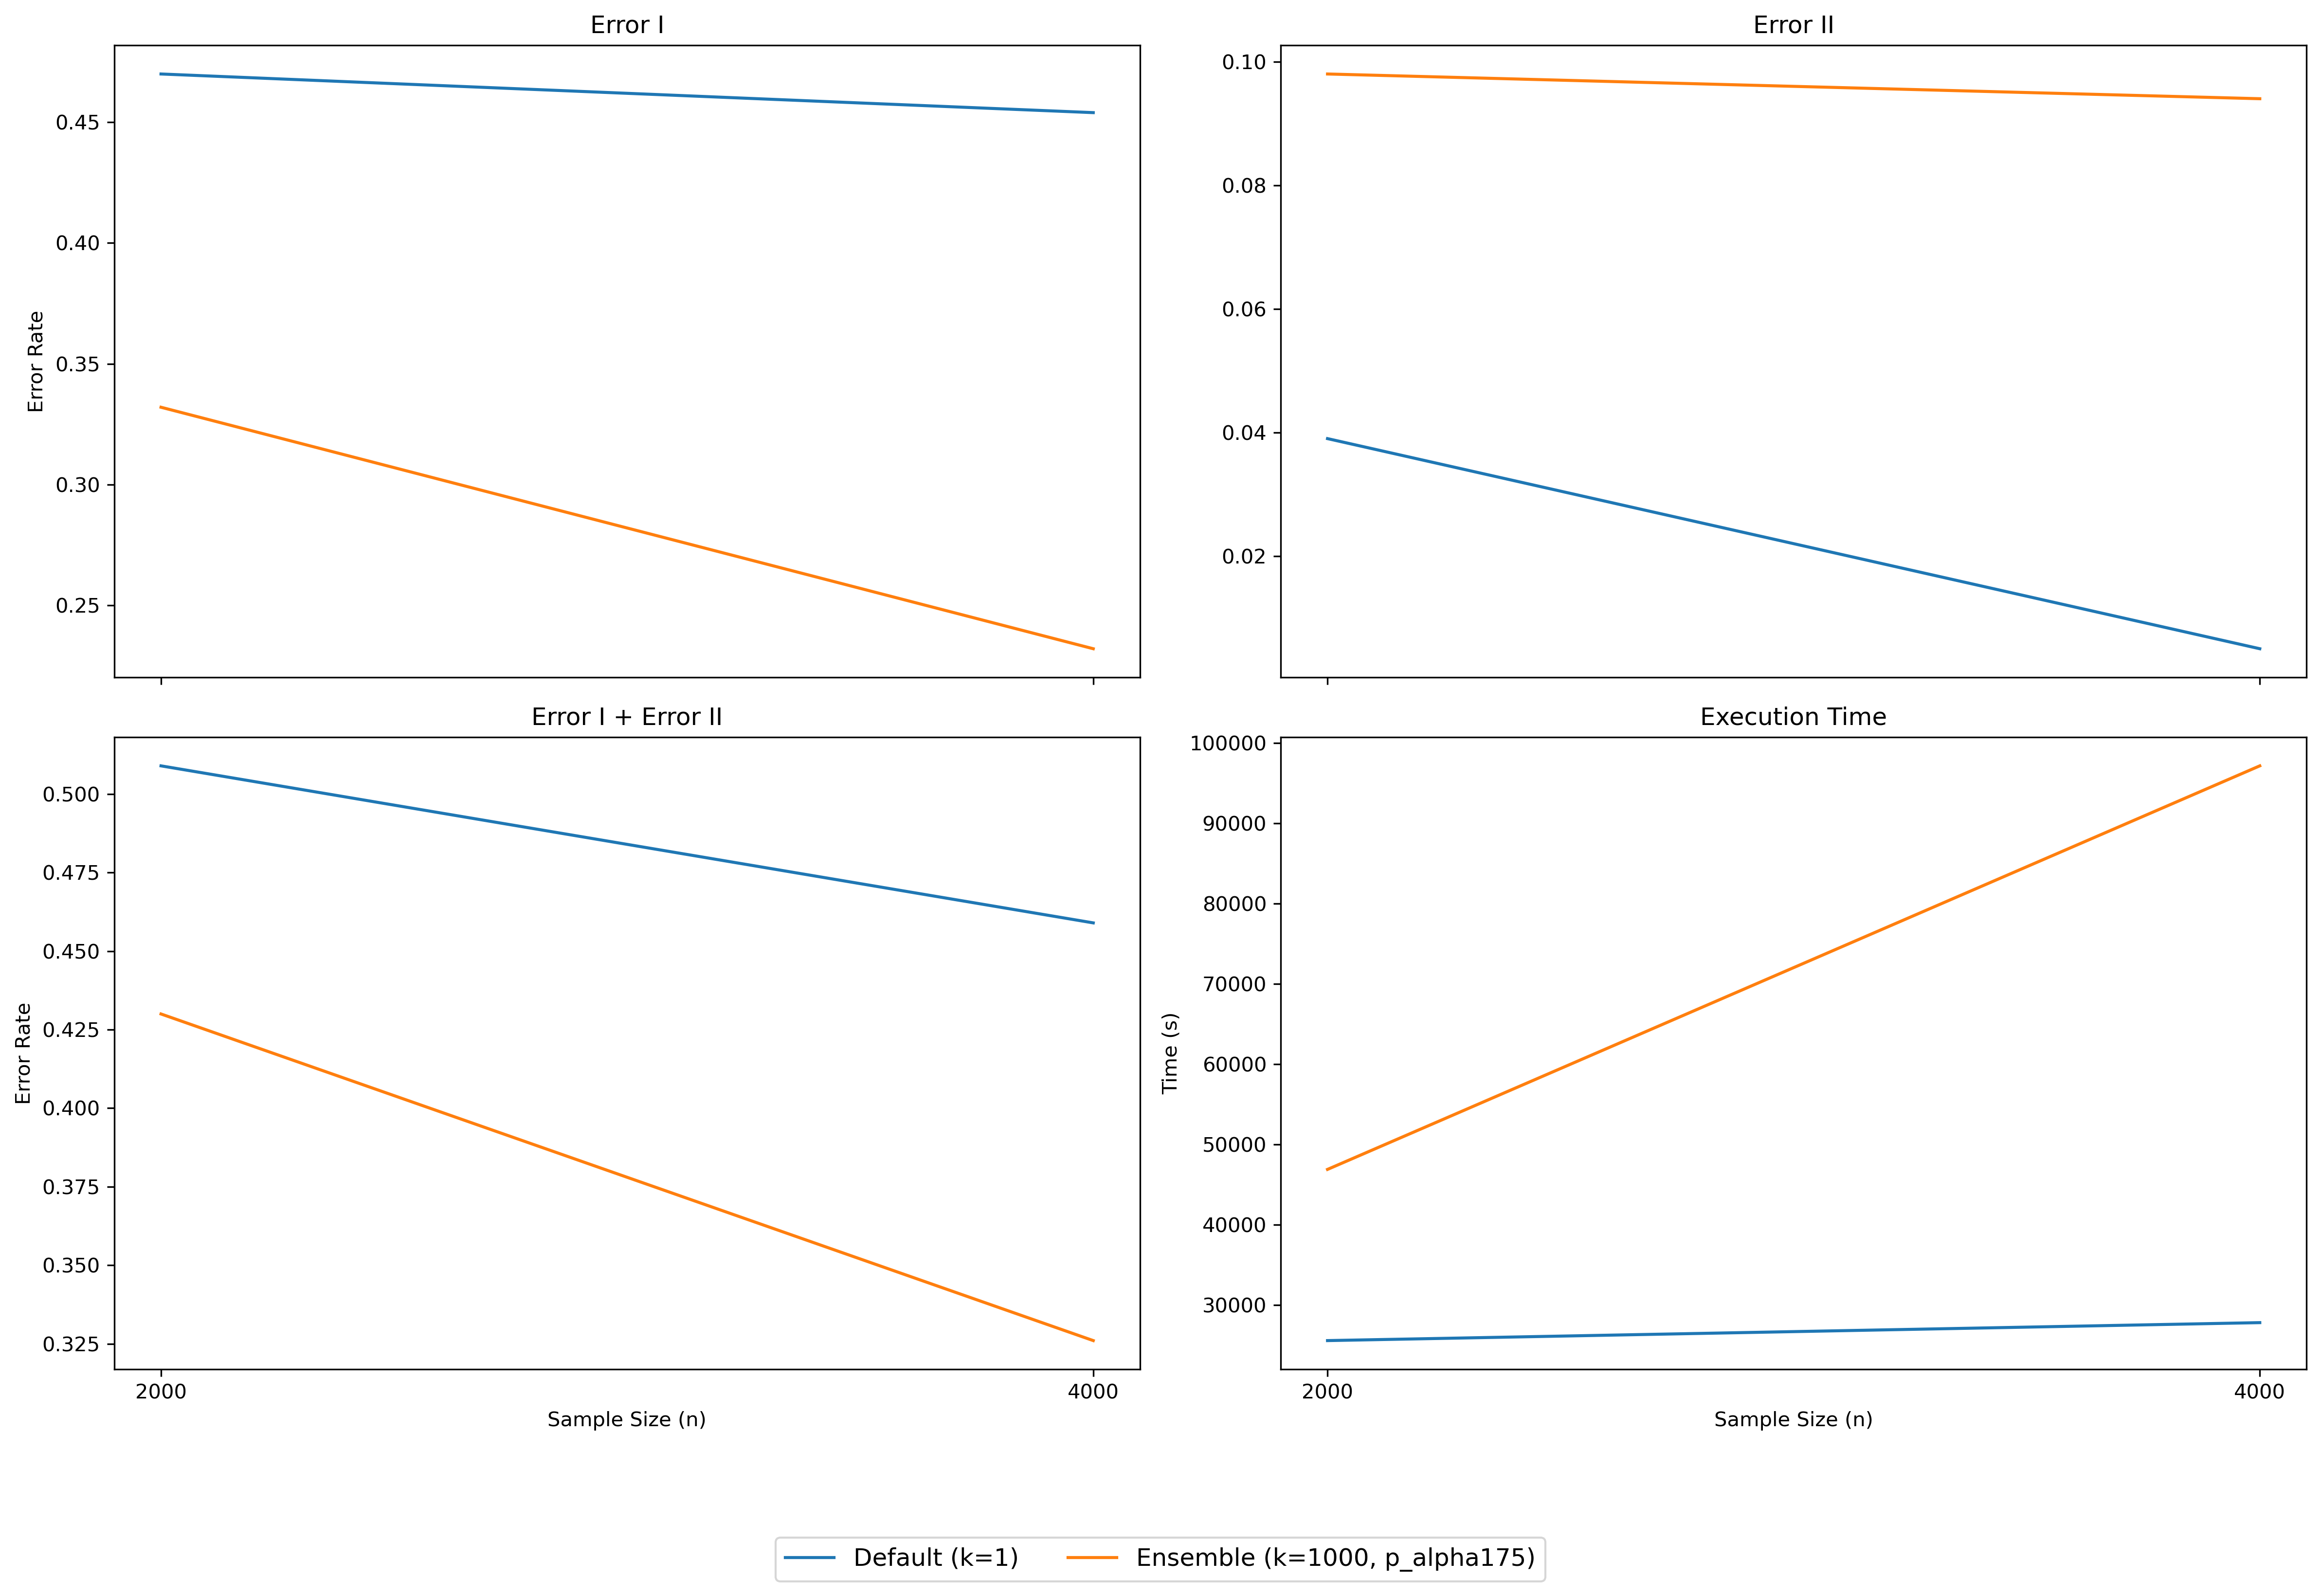

[[[0.47, 0.454], [0.039, 0.005], [25543.775492191315, 27781.818355321884]],
 [[0.332, 0.232], [0.098, 0.094], [46873.505193948746, 97153.93441033363]]]

In [17]:
results = ecit_simu(n_list=n_list, t=t, cit=cit, ensembles=ensembles,
                    dz=20,z_dis='gaussian',noise_dis='t',noise_std=1,fun1=None,fun2=None)
show_results(results, ensembles, n_list)
results